In [1]:
import warnings
warnings.filterwarnings('ignore')

import os # m1 은 이거 안해도됨
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# train과 valid 분리

train_scaled = train_input / 255.0


train_scaled,val_scaled, train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

In [3]:
# Model 함수 구현
def model_fn(a_layer= None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model


In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss= 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3080 - accuracy: 0.8904
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8971
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.8965
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9007
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.9032
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9056
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.9069
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9100
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9136
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.249

## 손실곡선

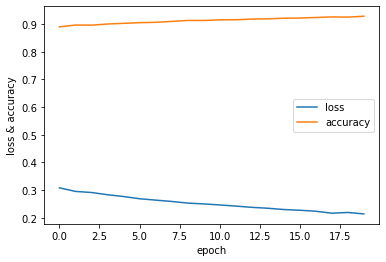

In [24]:
import numpy as np
import matplotlib.pyplot as plt

num = list(range(len(history.history['loss'])))

plt.plot(
    history.history['loss']
)
plt.plot(
    history.history['accuracy']
)

plt.xlabel('epoch')
plt.ylabel('loss & accuracy')
plt.legend(['loss','accuracy'],loc='right')
plt.show()

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [26]:

model = model_fn()
model.compile(loss= 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,
                    validation_data = (val_scaled,val_target)
)


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5332 - accuracy: 0.8114 - val_loss: 0.4307 - val_accuracy: 0.8465
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3947 - accuracy: 0.8579 - val_loss: 0.4132 - val_accuracy: 0.8553
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3568 - accuracy: 0.8718 - val_loss: 0.3721 - val_accuracy: 0.8708
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3343 - accuracy: 0.8801 - val_loss: 0.3457 - val_accuracy: 0.8803
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3198 - accuracy: 0.8858 - val_loss: 0.3804 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3046 - accuracy: 0.8911 - val_loss: 0.3660 - val_accuracy: 0.8753
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2961 - accuracy: 0.8951 - val_loss: 0.3708 - val_accuracy:

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

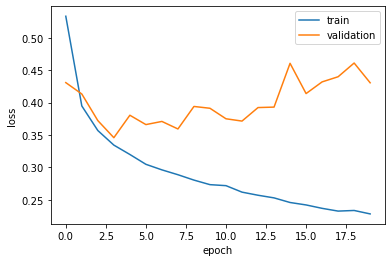

In [33]:

plt.plot(
    history.history['loss']
)
# plt.plot(
#     history.history['accuracy']
# )
plt.plot(
    history.history['val_loss']
)
# plt.plot(
#     history.history['val_accuracy']
# )

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='best')
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epoch의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.  
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다. 


---
Optimizer(adam)

In [34]:
model = model_fn()
model.compile(optimizer='adam' ,loss= 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,
                    validation_data = (val_scaled,val_target)
)


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5229 - accuracy: 0.8163 - val_loss: 0.4490 - val_accuracy: 0.8426
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3922 - accuracy: 0.8595 - val_loss: 0.3855 - val_accuracy: 0.8621
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3511 - accuracy: 0.8727 - val_loss: 0.3511 - val_accuracy: 0.8750
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3275 - accuracy: 0.8799 - val_loss: 0.3750 - val_accuracy: 0.8636
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3039 - accuracy: 0.8882 - val_loss: 0.3343 - val_accuracy: 0.8823
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2904 - accuracy: 0.8932 - val_loss: 0.3240 - val_accuracy: 0.8848
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.8972 - val_loss: 0.3380 - val_accuracy:

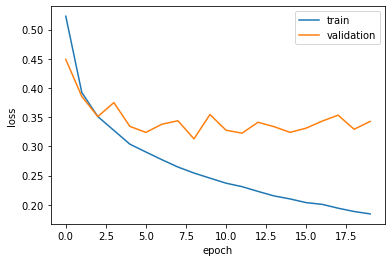

In [35]:

plt.plot(
    history.history['loss']
)
plt.plot(
    history.history['val_loss']
)

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='best')
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epoch의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.  
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다. 
> Optimizer(최적화 알고리즘을)사용한 것이 좀 더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직 해결이 않됨   

---
# Dropout
- 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample을 처리할 떄 은닉층의 임의의 node를 계산에 포함시키지 않는다.
- 랜덤하게 노드를 빼기 때문에 첫번째 샘플 학습할때 포함되지 않는 노드와 두번쨰 샘플 학습시 포함되지않는  노드가 다르다.

In [48]:
# model의 dropout을 추가해서 사용

model = model_fn(keras.layers.Dropout(0.3) ) # drop out을 30% 
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam' ,loss= 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,
                    validation_data = (val_scaled,val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6013 - accuracy: 0.7871 - val_loss: 0.4472 - val_accuracy: 0.8332
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4418 - accuracy: 0.8415 - val_loss: 0.3823 - val_accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4085 - accuracy: 0.8518 - val_loss: 0.3744 - val_accuracy: 0.8601
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3846 - accuracy: 0.8588 - val_loss: 0.3609 - val_accuracy: 0.8713
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3702 - accuracy: 0.8650 - val_loss: 0.3596 - val_accuracy: 0.8637
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8675 - val_loss: 0.3457 - val_accuracy: 0.8697
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3477 - accuracy: 0.8721 - val_loss: 0.3334 - val_accuracy:

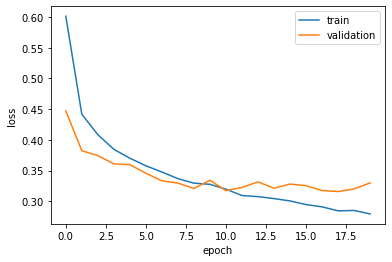

In [50]:

plt.plot(
    history.history['loss']
)
plt.plot(
    history.history['val_loss']
)

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='best')
plt.show()

> epochs가 10일 경우가 train과 val의 차이가 적은 것 같다.  
> 기본적으로 훈련세트와 손실이 검증세트보다 적게 나오는 epochs의 갯수를 선택한다.  

---
### 모델의 저장과 복원
- hdf5 format으로 저장

In [51]:
# model 저장
model.save('../Data/model-whole.h5')

In [52]:
# 복원 
model = keras.models.load_model("../Data/model-whole.h5")

In [53]:
# 사용 
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8827


[0.3300391733646393, 0.8826666474342346]

---
# Callbacks
- 훈련 수행 시 손실값이 제일 작은 함수를 저장해 준다. <- 굉장히 편함



In [56]:
model = model_fn(keras.layers.Dropout(0.3) ) # drop out을 30% 

model.compile(optimizer='adam' ,loss= 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
history2 = model.fit(train_scaled,train_target,epochs = 20,
                    validation_data = (val_scaled,val_target),
                    callbacks= [checkpoint_cb]
        )

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5909 - accuracy: 0.7900 - val_loss: 0.4278 - val_accuracy: 0.8483
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4425 - accuracy: 0.8418 - val_loss: 0.3842 - val_accuracy: 0.8606
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4059 - accuracy: 0.8520 - val_loss: 0.3636 - val_accuracy: 0.8681
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3841 - accuracy: 0.8591 - val_loss: 0.3492 - val_accuracy: 0.8720
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3683 - accuracy: 0.8655 - val_loss: 0.3656 - val_accuracy: 0.8681
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3577 - accuracy: 0.8699 - val_loss: 0.3493 - val_accuracy: 0.8731
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3467 - accuracy: 0.8742 - val_loss: 0.3382 - val_accuracy:

In [61]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [59]:
model= keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8838


[0.3204779028892517, 0.8838333487510681]

---
# Early-Stopping(조기종료)
- callbacks처럼 끝까지 기다리는 것이 아니고 hyper parameter을 선정하여 한계값을 정해 실행한다.

In [67]:
model = model_fn(keras.layers.Dropout(0.3) ) # drop out을 30% 

model.compile(optimizer='adam' ,loss= 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,restore_best_weights=True) ## patience 는 로스?인가 정확도? 둘중하나 가 감소되다가 올라가는 것을 참는 횟수, restore~ 는 꼭해야됨 참기전 최솟값을 저장해주는 옵션
history2 = model.fit(train_scaled,train_target,epochs = 20,
                    validation_data = (val_scaled,val_target),
                    callbacks= [checkpoint_cb,early_stopping_cb]
        )

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5863 - accuracy: 0.7942 - val_loss: 0.4497 - val_accuracy: 0.8313
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4401 - accuracy: 0.8423 - val_loss: 0.3934 - val_accuracy: 0.8557
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4006 - accuracy: 0.8561 - val_loss: 0.3766 - val_accuracy: 0.8608
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3843 - accuracy: 0.8606 - val_loss: 0.3589 - val_accuracy: 0.8640
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3661 - accuracy: 0.8658 - val_loss: 0.3395 - val_accuracy: 0.8755
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8702 - val_loss: 0.3327 - val_accuracy: 0.8789
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3423 - accuracy: 0.8744 - val_loss: 0.3285 - val_accuracy:

In [66]:
# 몇번쨰 epochs에서 stop 되었는 가? 
early_stopping_cb.stopped_epoch

0

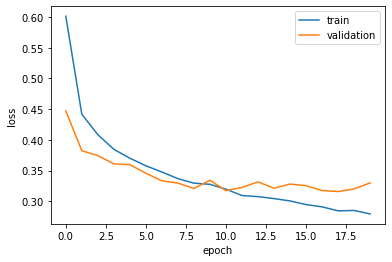

In [65]:

plt.plot(
    history.history['loss']
)
plt.plot(
    history.history['val_loss']
)

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='best')
plt.show()

In [36]:
model = model_fn()

model = model_fn()
model.compile(optimizer='sgd' ,loss= 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,
                    validation_data = (val_scaled,val_target)
)


Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7888 - accuracy: 0.7429 - val_loss: 0.5973 - val_accuracy: 0.8005
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5385 - accuracy: 0.8175 - val_loss: 0.5301 - val_accuracy: 0.8163
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4899 - accuracy: 0.8323 - val_loss: 0.4787 - val_accuracy: 0.8342
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4637 - accuracy: 0.8397 - val_loss: 0.4586 - val_accuracy: 0.8394
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4459 - accuracy: 0.8457 - val_loss: 0.4454 - val_accuracy: 0.8442
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4327 - accuracy: 0.8506 - val_loss: 0.4388 - val_accuracy: 0.8478
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4213 - accuracy: 0.8537 - val_loss: 0.4474 - val_accuracy:

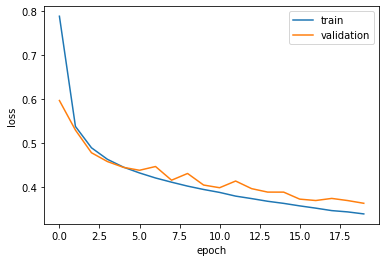

In [37]:
plt.plot(
    history.history['loss']
)
plt.plot(
    history.history['val_loss']
)

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='best')
plt.show()